# Introduction to Sklearn 

In [1]:
#lets list all workflow

steps  = [
"0. An end to end sk-learn workflow",
"1. Getting your data ready (to be used with ML models)",
"2. Choosing a estimator/algo/ML model",
"3. Fitting a model/algo to data (learing patterns)",
"4. Evaluating model predictions",
"5. Improving model predictions",
"6. Saving and loading model"
]
steps

['0. An end to end sk-learn workflow',
 '1. Getting your data ready (to be used with ML models)',
 '2. Choosing a estimator/algo/ML model',
 '3. Fitting a model/algo to data (learing patterns)',
 '4. Evaluating model predictions',
 '5. Improving model predictions',
 '6. Saving and loading model']

In [2]:
#standard imports 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

# 1.  Getting your data ready (to be used with ML models)
    
Three main things we have to do 
    1. Split the data into features and labels (usually 'X' and 'y')
    2. Filling/ imputing  or disregarding missing values 
    3. Converting non-numeric values to numeric values(ALso called feature encoding)
    

In [3]:
heart_disease =  pd.read_csv("data_sets/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Split the data into features and labels (usually 'X' and 'y')
X = heart_disease.drop('target',axis  = 1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [5]:
y  = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [6]:
# Split data into train and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  =  train_test_split(X, y, test_size = 0.2)

In [7]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [8]:
X.shape[0]*0.8 # cross check 

242.4

##     

##  1.1 Make sure the data set is all numric

In [9]:
car_sales = pd.read_csv("data_sets/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [10]:
len(car_sales)

1000

In [11]:
#it is a categorical column
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [12]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [13]:
#Split is X and y 
X =  car_sales.drop('Price',axis=1)
y = car_sales['Price']

#Split into training and test 
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [14]:
#Build a ML model 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Nissan'

In [15]:
#ValueError: becaseu Ml models do not understand non-numeric values 


In [16]:
#Trun categories into numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features  = ['Make','Colour','Doors']
one_hot  = OneHotEncoder()
transformer  = ColumnTransformer([('one_hot',
                                   one_hot,
                                  categorical_features)],
                                remainder = "passthrough")
#Hey ColumnTransformer apply OneHotEncoder to caregorical_features and passthrough the remainder, which is odometer column
transformed_X  = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [17]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [18]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [19]:
#another and clear way is dummy encoding 
dummies   = pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [20]:
 #Now lets refit our model 
np.random.seed(42)
X_train , X_test, y_train, y_test = train_test_split(transformed_X,
                                                     y,
                                                     test_size = 0.2)

model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [21]:
model.score(X_test,y_test)

0.3235867221569877

## 1.2 What if there is a missing data values 
1. Fill them with some values(imputation)
2. Remove the samples with missing data altogether

In [22]:
# Import car sales missing data 
car_sales_missing  = pd.read_csv("data_sets/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [23]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [24]:
#Create X and y 
X  = car_sales_missing.drop("Price",axis = 1)
y = car_sales_missing["Price"]


In [25]:
#Lets try and convert our data into numbers 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features  = ['Make','Colour','Doors']
one_hot  = OneHotEncoder()
transformer  = ColumnTransformer([('one_hot',
                                   one_hot,
                                  categorical_features)],
                                remainder = "passthrough")
#Hey ColumnTransformer apply OneHotEncoder to caregorical_features and passthrough the remainder, which is odometer column
transformed_X  = transformer.fit_transform(X)
transformed_X

ValueError: Input contains NaN

In [26]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [27]:
#yes our data contains NaN

### Option 1. fill missing data with pandas


In [28]:
car_sales_missing["Doors"].value_counts()
#4 doors are the most frequent door value

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [29]:
#Fill the "Make" column 
car_sales_missing["Make"].fillna('missing',inplace = True)

#Fill the "Colour" column
car_sales_missing['Colour'].fillna('missing',inplace =  True)

#Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace = True)


#Fill the "Doors" column 
car_sales_missing["Doors"].fillna(4, inplace = True)

In [30]:
#Check our dataframe one more time 
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

#Remove rows with missing Price values because this is what we are predicting and imputing data for predictor column may leads t misleading results 


In [31]:
car_sales_missing.dropna(inplace =  True)

In [32]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [33]:
len(car_sales_missing)

950

In [34]:
X = car_sales_missing.drop('Price',axis = 1)
y = car_sales_missing["Price"]

In [35]:
#Lets  again try and convert our data into numbers 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features  = ['Make','Colour','Doors']
one_hot  = OneHotEncoder()
transformer  = ColumnTransformer([('one_hot',
                                   one_hot,
                                  categorical_features)],
                                remainder = "passthrough")
#Hey ColumnTransformer apply OneHotEncoder to caregorical_features and passthrough the remainder, which is odometer column
transformed_X  = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2 : Fill missing values with Scikit-Learn 

In [36]:
car_sales_missing  = pd.read_csv("data_sets/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [37]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [38]:
#Dropper the rows with missing Target/label values 
car_sales_missing.dropna(subset= ["Price"],inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [39]:
#Split into X and y 
X  = car_sales_missing.drop('Price',axis = 1)
y = car_sales_missing["Price"]


In [40]:
#Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Fill categorical values with "missing" and numerical values with "mean"
categorical_imputer = SimpleImputer(strategy = "constant",fill_value =  'missing')
door_imputer  = SimpleImputer(strategy = "constant",fill_value = 4)
num_imputer =  SimpleImputer(strategy = "mean")

#define columns 
categorical_features =  ["Make","Colour"]
door_feature =  ["Doors"]
num_feature =  ["Odometer (KM)"]

#creates an imputer (somthing data fills missing data)
imputer  = ColumnTransformer([
    ("cat_imputer",categorical_imputer,categorical_features),
    ("door_imputer",door_imputer,door_feature),
    ("num_imputer",num_imputer,num_feature)
])

#Transform the data 
filled_X =  imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [41]:
#create Dataframe out of above transformations
car_sales_filled =  pd.DataFrame(filled_X,columns = ["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [42]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [43]:
#Trun categories into numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features  = ['Make','Colour','Doors']
one_hot  = OneHotEncoder()
transformer  = ColumnTransformer([('one_hot',
                                   one_hot,
                                  categorical_features)],
                                remainder = "passthrough")
#Hey ColumnTransformer apply OneHotEncoder to caregorical_features and passthrough the remainder, which is odometer column
transformed_X  = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [44]:
#we have transformed our data as numbers and filled(with no missing values)
#Let's fit a model 
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,y,test_size = 0.2)

model =  RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [45]:
#this model is performing worse than the previous one becasue of less data avaible to train 
len(car_sales_filled), len(car_sales)

(950, 1000)

In [46]:
steps

['0. An end to end sk-learn workflow',
 '1. Getting your data ready (to be used with ML models)',
 '2. Choosing a estimator/algo/ML model',
 '3. Fitting a model/algo to data (learing patterns)',
 '4. Evaluating model predictions',
 '5. Improving model predictions',
 '6. Saving and loading model']

## 2. Choosing a estimator/algo/ML model

* Classification -  Predicting wheather a sample is one thing or another 
* Regression -  Predicting a number 

## Sk-learn Map -  https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
![](Images/ml_map.png)

## 2.1 Picking a machine learning model for regression problem 

In [47]:
# Import boston housing dataset
from sklearn.datasets import load_boston
boston =  load_boston()

In [48]:
boston
#It is imported as a dict , let's transform it into Pandas DataFrame 

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [49]:
df_boston =  pd.DataFrame(boston["data"],columns = boston["feature_names"])
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [50]:
df_boston["target"] =  pd.Series(boston["target"])
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## https://scikit-learn.org/stable/datasets/index.html#boston-dataset
* here is some info about above dataset 

In [51]:
#how many sample we have 
len(df_boston)

506

In [52]:
# Let's try the Ridge regression model 
from sklearn.linear_model import Ridge

#Setup a random seed
np.random.seed(42)

#Create the data 
X = df_boston.drop("target",axis = 1)
y = df_boston["target"]

#split into train and test test sets 
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2)

#Intantiate Ridge model 
model =  Ridge()
model.fit(X_train, y_train )

#Check the score of the ridge model on Test data 
model.score(X_test, y_test)


0.6662221670168522

#### How do we import this score ?
#### What if ridge was not working ? 

### let's refer back to the map 
###  https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


In [53]:
# Let's try Randomforest reggresorfrom ensemble method
from sklearn.ensemble import RandomForestRegressor

#setup random seed 
np.random.seed(42)

#Create the data 
X = df_boston.drop("target",axis = 1)
y = df_boston["target"]

#split into train and test test sets 
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2)

#Intantiate RandomForestRegressor model
rf =  RandomForestRegressor()
rf.fit(X_train, y_train)

#Evaluate the RandomForest Regressor 
rf.score(X_test, y_test)



0.873969014117403

In [54]:
#let's compare it with score of ridge model, which is 
model.score(X_test, y_test)


0.6662221670168522

In [55]:
#did you see the improvement

### 2.1 Picking a machine learning model for classification problem

 https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [56]:
heart_disease  = pd.read_csv("data_sets/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [57]:
#Now foolow the scikit learn map 
#do we have samplesize >50
len(heart_disease)

303

Consulting the Scikit learn map and it says try `linear SVC`



In [58]:
#import linearSVC estimator class 
from sklearn.svm import LinearSVC

#set-up random seed
np.random.seed(42)

#Make the data 
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

#Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate LinearSVC
clf =  LinearSVC(max_iter = 10000)
clf.fit(X_train, y_train)

#Evaluate LinearSVC 
clf.score(X_test, y_test)



/home/gagan/Desktop/Ml-Sample/env/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [59]:
#import RandomForestclassifier estimator class 
from sklearn.ensemble import RandomForestClassifier

#set-up random seed
np.random.seed(42)

#Make the data 
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

#Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate RandomForestClassifier 
clf =  RandomForestClassifier()
clf.fit(X_train, y_train)

#Evaluate LinearSVC 
clf.score(X_test, y_test)

0.8524590163934426

### Tip: 
        1. If you have structured data, use ensemble methods 
        2. If you have unstructured data, use deeplearning or trasfer learning 

In [60]:
steps

['0. An end to end sk-learn workflow',
 '1. Getting your data ready (to be used with ML models)',
 '2. Choosing a estimator/algo/ML model',
 '3. Fitting a model/algo to data (learing patterns)',
 '4. Evaluating model predictions',
 '5. Improving model predictions',
 '6. Saving and loading model']

## 3.Fitting a model/algo to data (learing patterns) and use it to make prediction 
### 3.1 Fitting the model to data

 Note : 
*        `X` = features / feature variables / data 
*        `y` = labels, targets, target variables 

In [61]:
#import RandomForestclassifier estimator class 
from sklearn.ensemble import RandomForestClassifier

#set-up random seed
np.random.seed(42)

#Make the data 
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

#Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate RandomForestClassifier 
clf =  RandomForestClassifier()

#Fit the model to the Data (Training the machine learning model )
clf.fit(X_train, y_train)

#Evaluate LinearSVC classifier (Use the patterns the model has learned )
clf.score(X_test, y_test)

0.8524590163934426

In [62]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [63]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Making prediction using machine learning model 

Two ways to make prediction:
    *  1. `predict()`
    *  2. `predict_proba()`


In [64]:
# Use a trained model to make predictions 
clf.predict(np.array([2,3,4,5,6,7]))


ValueError: Expected 2D array, got 1D array instead:
array=[2. 3. 4. 5. 6. 7.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [65]:
#in order to predict, we have to supply data in same shape as suplier for training 
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [66]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [67]:
# Compare predictions to truth labels to evaluate the model 
y_preds =  clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [68]:
clf.score(X_test, y_test)

0.8524590163934426

In [69]:

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds)

0.8524590163934426

In [70]:
steps

['0. An end to end sk-learn workflow',
 '1. Getting your data ready (to be used with ML models)',
 '2. Choosing a estimator/algo/ML model',
 '3. Fitting a model/algo to data (learing patterns)',
 '4. Evaluating model predictions',
 '5. Improving model predictions',
 '6. Saving and loading model']

### 3.2. make prediction with predict_proba()



In [71]:
# predict_proba() returns probablities of classification labels 
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [72]:
#let's predict on the same data 
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

### `predict()` can also be used for regression model 

In [73]:
from sklearn.ensemble import RandomForestRegressor 

In [74]:
np.random.seed(42)

In [75]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [76]:
# Create the data 
X  = df_boston.drop('target',axis = 1)
y = df_boston["target"]

# Split into train and test sets 
X_train,X_test,y_train,y_test  = train_test_split(X, y, test_size  = 0.2) 

# Instantiate and fit model 
model= RandomForestRegressor().fit(X_train, y_train)

# MAke predictions 
y_predict =  model.predict(X_test)
y_predict[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [77]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [78]:
# Compare the prediction to the truth 
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_predict)

2.1226372549019623

## 4. Evaluating a machine learning model 

Three ways to evaluate Scikit-learn models/estimators: 
1. Estimator `score ` method 
2. The `scoring` parameter
3. Problem-specific metric functions

### 4.1 Evaluating a model with `score` method 

In [79]:
#import RandomForestclassifier estimator class 
from sklearn.ensemble import RandomForestClassifier

#set-up random seed
np.random.seed(42)

#Make the data 
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

#Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate RandomForestClassifier 
clf =  RandomForestClassifier()

#Fit the model to the Data (Training the machine learning model )
clf.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
 clf.score(X_train, y_train)

1.0

In [81]:
clf.score(X_test, y_test)
#note: default metric is mean accuracy on the given test data and labels

0.8524590163934426

let's do the same but for regression

In [82]:
# Create the data 
X  = df_boston.drop('target',axis = 1)
y = df_boston["target"]

# Split into train and test sets 
X_train,X_test,y_train,y_test  = train_test_split(X, y, test_size  = 0.2) 

# Instantiate and fit model 
model= RandomForestRegressor().fit(X_train, y_train)

In [83]:
model.score(X_test, y_test)
#note: default score metric is R^2(ccoefficient of determination )

0.8476644039421872

### 4.2 Evaulating the model using `scoring` parameter

In [84]:
from sklearn.model_selection import cross_val_score 
#olny evaluation method is different 


#import RandomForestclassifier estimator class 
from sklearn.ensemble import RandomForestClassifier

#set-up random seed
np.random.seed(42)

#Make the data 
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

#Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate RandomForestClassifier 
clf =  RandomForestClassifier()

#Fit the model to the Data (Training the machine learning model )
clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
clf.score(X_test, y_test)

0.8524590163934426

In [86]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])


![](Images/sklearn-cross-validation.png)


So, With k fold cross validation method of evaluation, we train and test our model on n = 5 ,in this example,splits of Train and Test datasets  to avoide overfitting 

In [87]:
cross_val_score(clf, X, y, cv=5)

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

In [88]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.83870968, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.76666667, 0.83333333, 0.73333333, 0.83333333])

In [89]:
#depands of number of combinations on train test splits, we will receive an evaluation score on each split 

In [90]:
np.random.seed(42)

#single training and test split 
single_score =  clf.score(X_test, y_test)

#take mean of 5 fold cross validation score 
clf_cross_val_score  = np.mean(cross_val_score(clf,X,y ,cv = 5))

#compare the two 
single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [91]:
# Default scoring parameter of classifier = mean accuracy
# clf.score()

In [92]:
# When Scoring parameter set to none by default it uses the default scoring parameter
cross_val_score(clf,X,y,cv=5,scoring = None)


array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation matrics 

1. Accuracy 
2. Area under ROC curve 
3. Confusion matrix 
4. Classification report


**Accuracy**

In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X =  heart_disease.drop('target', axis = 1)
y =  heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv = 5)

In [94]:
np.mean(cross_val_score)

0.8248087431693989

In [95]:
print(f"Heart Disease classifier Cross Validated Accuracy:{np.mean(cross_val_score)*100 : .2f} %")

Heart Disease classifier Cross Validated Accuracy: 82.48 %


**Area under Receiver Operating characteristic curve (AUC/ROC)**
* Area under the curve (AUC)
* Receiver Operating characteristic (ROC)

ROC curves are a comparision of a model's true positive rate (tpr) versus a model's false postive rate (fpr).

* True positive = model predicts 1 when truth is 1 
* False positive = model predicts 1 when truth is 0
* True negative =  model predicts 0 when truth is 0
* False negative =  model predicts 0 when truth is 1

In [96]:
# Create train, test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [97]:
from sklearn.metrics import roc_curve
#fit classifier 
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs =  clf.predict_proba(X_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [98]:
# probablity of 1 
y_prob_postive = y_probs[:,1]
y_prob_postive

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 , 0.87,
       0.71, 0.96, 0.47, 0.85, 0.11, 0.81, 0.66, 0.06, 0.08, 0.95, 0.86,
       0.99, 0.81, 0.05, 0.36, 0.85, 0.16, 0.71, 0.49, 0.2 , 0.15, 0.24,
       0.6 , 0.92, 0.99, 0.85, 0.77, 0.19, 1.  , 0.4 , 0.76, 0.89, 0.33,
       0.  , 0.49, 0.04, 0.92, 0.8 , 0.38, 0.49, 0.23, 0.87, 0.31, 0.45,
       0.98, 0.71, 0.13, 0.98, 0.14, 0.07])

In [99]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob_postive)


# Check thge false positive rates 
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

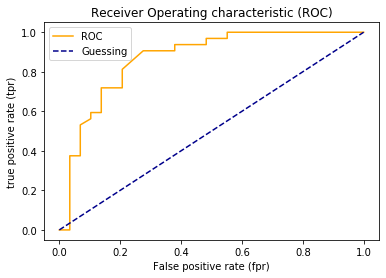

In [100]:
# Create a function for plotting ROC curves

import matplotlib.pyplot as plt 

def plot_roc_curve(fpr, tpr):
    
    """
    Plot a ROC curve given the false positive rate(fpr) 
    and true positive rate(tpr) of a model
    """
    # plot roc curve 
    plt.plot(fpr, tpr, color = "orange", label = "ROC")
    
    # plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1], color = "darkblue", linestyle = "--", label = "Guessing")
    
    # Customize the plot 
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('true positive rate (tpr)')
    plt.title('Receiver Operating characteristic (ROC)')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)


In [101]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_prob_postive)

0.8669181034482759

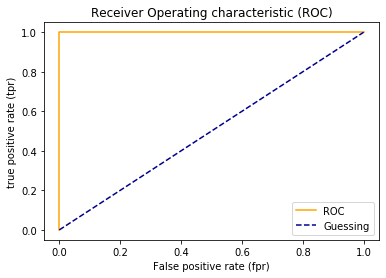

In [102]:
# PLot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

In [103]:
# Prefect AUC score
roc_auc_score(y_test, y_test)

1.0

***Confusion Matrix***

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. 

In essence, giving you an idea of where the model is getting confused.

In [104]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [105]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test, y_preds, rownames = ["Actual Labels"], colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [106]:
# #How to install conda package from jupyter notebook 
# import sys 
# !conda install --yes --prefix{sys.prefix} seaborn


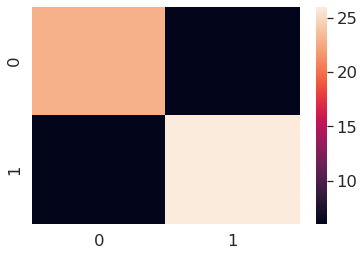

In [107]:
# Make our confusion matrix more visual with seaborn's heatmap 

import seaborn as sns 

# Set  the font scale 
sns.set(font_scale = 1.5)

# Create a confusion matrix 
conf_mat = confusion_matrix(y_test, y_preds)

#Plot it using seaborn 
sns.heatmap(conf_mat)


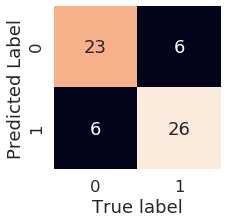

In [108]:
# let's make this heat make more visually appealing 

def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(conf_mat, 
                    annot = True, # Annotation the boxes with conf_mat info
                    cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted Label");
    
plot_conf_mat(conf_mat)

***Classification Report***

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



https://muthu.co/understanding-the-classification-report-in-sklearn/#:~:text=A%20Classification%20report%20is%20used,predictions%20from%20a%20classification%20algorithm.&text=More%20specifically%2C%20True%20Positives%2C%20False,classification%20report%20as%20shown%20below

### 4.2.2 Regression model evaluation metrics 

Model evaluation matric documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (coefficient of determination)
2. Mean absolute error (MAE) 
3. Mean squared error (MSE)


**R^2**
What R62 does? - Compare your model's predictions to the mean of the target . Values can be range from -ve infinity(a very poor model) to 1. For example, if all your model does is predict the mean of the target, it's R^2 value would be 0.And if your model perfectly predict a range of numbers it's R^2 value would be 1.


In [110]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = df_boston.drop("target",axis =1)
y= df_boston["target"]

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train);

In [111]:
model.score(X_test, y_test)

0.873969014117403

In [112]:
#Lets the R2 explaination 

from sklearn.metrics import r2_score 

# Fill in array wirth y_test mean 
y_test_mean  = np.full(len(y_test),y_test.mean())


In [113]:
y_test.mean()

21.488235294117644

In [114]:
r2_score(y_test, y_test_mean)

0.0

In [115]:
r2_score(y_test,y_test)

1.0

**Mean absolute error (MAE)**

In [116]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mae = mean_absolute_error(y_test, y_preds)
mae

2.1226372549019623

In [117]:
df_mae = pd.DataFrame(data={"Actual values": y_test,"Predicted values": y_preds})
df_mae

,Actual values,Predicted values
173,23.6,23.002
274,32.4,30.826
491,13.6,16.734
72,22.8,23.467
452,16.1,16.853
...,...,...
412,17.9,13.030
436,9.6,12.490
411,17.2,13.406
86,22.5,20.219


In [118]:
df_mae["differences"] = df_mae["Actual values"] - df_mae["Predicted values"]
df_mae

,Actual values,Predicted values,differences
173,23.6,23.002,0.598
274,32.4,30.826,1.574
491,13.6,16.734,-3.134
72,22.8,23.467,-0.667
452,16.1,16.853,-0.753
...,...,...,...
412,17.9,13.030,4.870
436,9.6,12.490,-2.890
411,17.2,13.406,3.794
86,22.5,20.219,2.281


MAE is the  average of the aboslute differemces between predicted and actual values. it gives you an idea of how wrong your models predictions are.

In [119]:
abs(df_mae["differences"]).mean()

2.1226372549019623

 **Mean squared error (MSE)**

In [120]:
from sklearn.metrics import mean_squared_error
 
mse = mean_squared_error(y_test, y_preds)
mse

9.242328990196082

In [121]:
df_mse = pd.DataFrame(data={"Actual values": y_test,"Predicted values": y_preds})
df_mse

,Actual values,Predicted values
173,23.6,23.002
274,32.4,30.826
491,13.6,16.734
72,22.8,23.467
452,16.1,16.853
...,...,...
412,17.9,13.030
436,9.6,12.490
411,17.2,13.406
86,22.5,20.219


In [122]:
df_mse["differences"] = df_mse["Actual values"] - df_mse["Predicted values"]
df_mse

,Actual values,Predicted values,differences
173,23.6,23.002,0.598
274,32.4,30.826,1.574
491,13.6,16.734,-3.134
72,22.8,23.467,-0.667
452,16.1,16.853,-0.753
...,...,...,...
412,17.9,13.030,4.870
436,9.6,12.490,-2.890
411,17.2,13.406,3.794
86,22.5,20.219,2.281


In [123]:
df_squared =(df_mse["differences"])**2
df_squared.mean()

9.242328990196082

In [124]:
#tibbit : Goal - minimize MAE,MSE and maximize R2

### 4.2.3 Finally using the `scoring` parameter 

In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X =  heart_disease.drop("target", axis =1)
y = heart_disease["target"]

clf  = RandomForestClassifier()


In [126]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring = None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [127]:
# Cross Validated accuracy 
print(f"the cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}% ")

the cross-validated accuracy is: 82.48% 


In [128]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring = 'accuracy')
print(f"the cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}% ")

the cross-validated accuracy is: 82.48% 


In [129]:
#Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring = 'precision')
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [130]:
print(f"the cross-validated precision is: {np.mean(cv_precision)*100:.2f}% ")

the cross-validated precision is: 83.30% 


In [131]:
# Recall 
cv_recall = cross_val_score(clf, X, y, cv=5, scoring = 'recall')
np.mean(cv_recall)

0.8424242424242424

In [132]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring = 'f1')
np.mean(cv_f1)

0.8298583662714097

how about our regression model cross_val ? 

In [133]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X= df_boston.drop('target',axis = 1 )
y = df_boston["target"]

model = RandomForestRegressor()


In [134]:
np.random.seed(42)

cv_r2  = cross_val_score(model, X ,y, cv = 5, scoring = None)
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [135]:
np.random.seed(42)

cv_r2  = cross_val_score(model, X ,y, cv = 5, scoring = 'r2')
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [136]:
# Mean absolute error 

cv_mae =  cross_val_score(model, X, y, cv =5, scoring = "neg_mean_absolute_error")
cv_mae

array([-2.12751961, -2.53956436, -3.42026733, -3.82432673, -3.06893069])

In [137]:
# MEan squared erorr 

cv_mse = cross_val_score(model, X, y, cv=5, scoring = "neg_mean_squared_error")
cv_mse

array([ -7.77433365, -12.76515461, -19.26965413, -46.20221782,
       -19.10133112])

### 4.3 Using different evaluation metrics as Scikit-learn functions 

***classification evaluation function***

In [138]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make some prediction 
y_preds = clf.predict(X_test)

# Evaluate the classifier 
print("Classifier matrics on the test sets ")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100 : .2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier matrics on the test sets 
Accuracy:  85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


***Regression evaluation function***

In [139]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X= df_boston.drop('target',axis = 1 )
y = df_boston["target"]

X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)

# Make some prediction 
y_preds =  model.predict(X_test)

#Evaluateing the regression model 
print("Regression model metrics on tthe test set")
print(f"R2: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")
      

Regression model metrics on tthe test set
R2: 0.8739690141174031
MAE: 2.1226372549019623
MSE: 9.242328990196082


https://scikit-learn.org/stable/modules/model_evaluation.html

In [140]:
steps

['0. An end to end sk-learn workflow',
 '1. Getting your data ready (to be used with ML models)',
 '2. Choosing a estimator/algo/ML model',
 '3. Fitting a model/algo to data (learing patterns)',
 '4. Evaluating model predictions',
 '5. Improving model predictions',
 '6. Saving and loading model']

## 5. Improving a model 

First prediction = baseline prediction 
First model  = baseline model 

From data prespective:
* Could we collect more data ?(generally, the more data, the better)
* Could we improve our data ? 

From a model perspective
* Is there a better model we could use?
* Could we improve the current model?

***Hyper Parameters vs Parameters***

* Parameters : model find these patterns in data 
* HyperParameters : settings on the model you can adjust to (potentially) improve its ability to find pattern.


In [141]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()


In [142]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

 ![](Images/sklearn-hyperparameter-tuning-oven.png)

Three ways to adjust hyperparameter
* by hand
* Randomly with randomsearchCV
* Exhaustively with GridSearchCV

### 5.1 Tuning hyperparameter by hand

Let's make three sets training, validation and test.

In [143]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust :
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_sample_split`
* `n_estimator`


In [144]:
def evaluate_preds(y_true, y_preds):
    """
    Perform evaluation comparison om y_true labels vs. y_pred labels.
    """
    accuracy  = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = { "accuracy": round(accuracy, 2),
                   "precision" : round(precision, 2),
                   "recall" : round(recall, 2 ),
                   "f1" : round(f1, 2)  }
    print(f"Acc: {accuracy * 100: .2f}%")
    print(f"Precision: {precision: .2f}%")
    print(f"Recall: {recall: .2f}%")
    print(f"f1: {f1:.2f}%")
    
    return metric_dict

In [145]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac = 1)

# Split into X and y
X  = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# Split the data into 

train_split =  round(0.7* len(heart_disease_shuffled))  #70% of data
valid_split =  round(train_split + 0.15*len(heart_disease_shuffled)) #15% of data

X_train, y_train = X[:train_split],y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid) , len(X_test) #just to check our split

(212, 45, 46)

In [146]:
 # Baseline model 
np.random.seed(42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train); # Baseline model 

# Make baseline Prediction
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc:  82.22%
Precision:  0.84%
Recall:  0.84%
f1: 0.84%


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

In [147]:
# All hypterparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [148]:
np.random.seed(42)

# Create a second classifier with different hyperparameter 
clf_2 = RandomForestClassifier(n_estimators=200)
clf_2.fit(X_train,y_train)

# Make predictions with different hyperparameters
y_preds_2  = clf_2.predict(X_valid)

# Evaluate the second classifeir 
clf_2_metrics =  evaluate_preds(y_valid, y_preds_2)

Acc:  82.22%
Precision:  0.81%
Recall:  0.88%
f1: 0.85%


### 5.2 Hyperparameter tunning with RandomizeSearchCV 



In [149]:
from sklearn.model_selection import RandomizedSearchCV

# Create a dict of hyperparameters as key and their values as values 
grid = {"n_estimators":[10,100,200,500,1000,1200],
        "max_depth": [None,5,10,20,30], 
        "max_features" : ["auto","sqrt"],
        "min_samples_split" : [2,4,6], 
        "min_samples_leaf":[1,2,4]}

np.random.seed(42)
# Split into X and y
X = heart_disease_shuffled.drop("target",axis = 1)
y = heart_disease_shuffled["target"]

# Train and test dastaset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs= 1 )

# Setup RandomizeSearchCV
re_clf  = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # numebr of model to try 
                            cv = 5,
                            verbose=2)
#Fit the RandomizeSearchCV version of clf
re_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.6s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.0s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   34.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [150]:
re_clf.best_params_ #Best cross validated results accross 10 different model 

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [151]:
# Make predictions with the best  hyperparameters 
re_y_preds  = re_clf.predict(X_test)

# Evaluate the predictions 
re_metrics =  evaluate_preds(y_test, re_y_preds)


Acc:  81.97%
Precision:  0.77%
Recall:  0.86%
f1: 0.81%


 ### 5.3 HyperParameter tunning with GridsearchCV 

In [152]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [153]:
(6*5*2*3*3)*5 
# this many parameter are possible to train,
# if we will try it on our local machine we may run out into issues
#So, lets reduce number of parameter for learning puropse only
# While reducing, we will keep best parameters selected by RandomizeSearchCV

2700

In [154]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [155]:
#grid_2 combinations 
(3*1*2*1*2)*5

60

In [156]:
# 60 is lot lesser than 2700

In [157]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)
# Split into X and y
X = heart_disease_shuffled.drop("target",axis = 1)
y = heart_disease_shuffled["target"]

# Train and test dastaset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs= 1 )

# Setup GridSearchCV
gs_clf  = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
#                             n_iter=10, # numebr of model to try, GridSearch try evey possiblity 
                            cv = 5,
                            verbose=2)
#Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.9s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.9s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   30.0s finished


In [158]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [159]:
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics =  evaluate_preds(y_test,gs_y_preds)

Acc:  78.69%
Precision:  0.74%
Recall:  0.82%
f1: 0.78%


Let's compare our different model matrics.

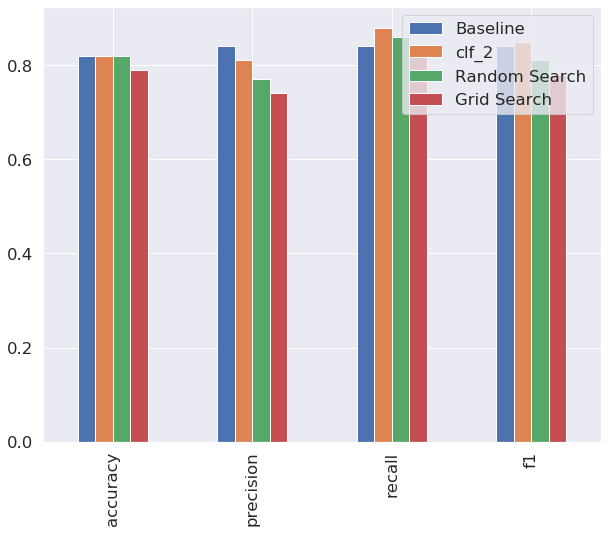

In [160]:
compare_metrics  = pd.DataFrame({"Baseline" : baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "Random Search": re_metrics,
                                "Grid Search": gs_metrics})
compare_metrics.plot.bar(figsize = (10,8));

In [161]:
 steps

['0. An end to end sk-learn workflow',
 '1. Getting your data ready (to be used with ML models)',
 '2. Choosing a estimator/algo/ML model',
 '3. Fitting a model/algo to data (learing patterns)',
 '4. Evaluating model predictions',
 '5. Improving model predictions',
 '6. Saving and loading model']

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. with python's `pickle` module 
2. With the `joblib` modile  

***Pickle***

In [162]:
import pickle 

# Save an existing model to file 
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [163]:
# Load saved model 

loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl","rb"))

In [164]:
# Make some prediction 
pickle_t_preds = loaded_pickle_model.predict(X_test)
evaluate_preds( y_test, pickle_t_preds)

Acc:  78.69%
Precision:  0.74%
Recall:  0.82%
f1: 0.78%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

***using Joblib***

In [165]:
from joblib import dump, load

# Save model to file 
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [166]:
# Import a save joblib model 

loaded_joblib_model  = load(filename = 'gs_random_forest_model_1.joblib')

In [167]:
# Make and Evaluate joblib prediction

joblib_y_preds =   loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc:  78.69%
Precision:  0.74%
Recall:  0.82%
f1: 0.78%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

In [168]:
# if the model data is large then use joblib over pickle 

In [169]:
steps 

['0. An end to end sk-learn workflow',
 '1. Getting your data ready (to be used with ML models)',
 '2. Choosing a estimator/algo/ML model',
 '3. Fitting a model/algo to data (learing patterns)',
 '4. Evaluating model predictions',
 '5. Improving model predictions',
 '6. Saving and loading model']

## 7. Putting it all together

This is how machine learning projects starts (steps 0 to 6) and  once you find that works, the refinement process begins 

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [170]:
data  = pd.read_csv("data_sets/car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


Steps we want to do (all in one cell)
1. Fill missing data 
2. Convert data to numers 
3. Build a model on the data

In [171]:
  data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [173]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [179]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data drop rows with missing labels
data = pd.read_csv("data_sets/car-sales-extended-missing-data.csv")
data.dropna(subset = ["Price"], inplace = True)

# Define different features and trasformer pipeline
caregorical_features = ["Make", "Colour"]
caregorical_transformer = Pipeline(steps = [("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
                                           ("onehot",OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
dorr_transformer = Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value=4))])

numeric_feature = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[("imputer",SimpleImputer(strategy="mean"))])

# Setup preprocessing steps (fill missing values, then convert to number)

preprocessor = ColumnTransformer(transformers=[
                                    ("cat",caregorical_transformer,categorical_features),
                                    ("door", dorr_transformer, door_feature),
                                    ("num",numeric_transformer,numeric_feature)
                                ]) 
# Creating a preprocessing and mnodelling pipeline 

model = Pipeline(steps = [("preprocessor", preprocessor),("model",RandomForestRegressor())])

# Split data 
X = data.drop("Price", axis = 1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Fit and score the model 
model.fit(X_train, y_train)
model.score(X_test,y_test)

TypeError: argument must be a string or number